# American Census

In [1]:
import numpy as np
import pandas as pd

from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme="oceans16")

import warnings
warnings.filterwarnings("ignore")

## Global config

In [2]:
# Data config
path_to_csv = "adult.csv"


## Load data

In [39]:
x_train_raw = pd.read_csv("X_train.csv")
y_train_raw = pd.read_csv("y_train.csv")

x_test_raw = pd.read_csv("X_test.csv")

## Helpers

In [4]:
# TODO

## Data exploration

### Question 1
<span style="color:#e6bc53">(1 point) Explore the features and target variables of the dataset. What is the right performance metric to use for this dataset? Clearly explain which performance metric you
choose and why. Use no more than 125 words.</span>

<p>We prefer to choose F1-score as our performance metric for this dataset. There are mainly three reasons for this choice.</p>
<p>1. This is a real-life binary classification problem, for which F1-score is widely used.</p> 
<p>2. When we explored the label set, we found that the set was imbalanced. There are approximately 4K people have the salaries above the threshold, but about 12K people are below that threshold. F1-score is a better metric to evaluate the imbalanced class distribution which has a large number of actual negatives, because the return value of F1-score is a harmonic mean of precision and recall.</p>
<p>3. We are familiar with this type of metric.</p>

In [5]:
x_train_raw.head()

,age,education-num,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,30,9.0,40,Private,HS-grad,Married-civ-spouse,Sales,Own-child,Asian-Pac-Islander,Female,United-States
1,77,10.0,6,NaN,Some-college,Married-civ-spouse,NaN,Husband,White,Male,United-States
2,44,12.0,50,Private,Assoc-acdm,Never-married,Prof-specialty,Unmarried,Black,Female,United-States
3,53,10.0,50,Private,Some-college,Never-married,Adm-clerical,Not-in-family,White,Female,United-States
4,41,10.0,40,Federal-gov,Some-college,Married-civ-spouse,Transport-moving,Wife,White,Female,United-States


In [6]:
x_train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16280 entries, 0 to 16279
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             16280 non-null  int64  
 1   education-num   16040 non-null  float64
 2   hours-per-week  16280 non-null  int64  
 3   workclass       15344 non-null  object 
 4   education       16280 non-null  object 
 5   marital-status  16280 non-null  object 
 6   occupation      15099 non-null  object 
 7   relationship    16280 non-null  object 
 8   race            16280 non-null  object 
 9   sex             16280 non-null  object 
 10  native-country  15980 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 1.4+ MB


In [7]:
y_train_raw.head()

,salary
0,0
1,0
2,0
3,1
4,1


In [8]:
y_train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16280 entries, 0 to 16279
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   salary  16280 non-null  int64
dtypes: int64(1)
memory usage: 127.3 KB


In [9]:
x_test_raw.head()

,age,education-num,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,74,10.0,40,Self-emp-inc,Some-college,Widowed,Exec-managerial,Unmarried,White,Male,United-States
1,17,8.0,15,Private,12th,Never-married,Handlers-cleaners,Own-child,White,Male,United-States
2,60,10.0,32,Private,Some-college,Married-civ-spouse,Craft-repair,Husband,Other,Male,United-States
3,62,9.0,42,Private,HS-grad,Widowed,Adm-clerical,Not-in-family,White,Female,United-States
4,52,10.0,65,Private,Some-college,Married-civ-spouse,Sales,Husband,White,Male,United-States


In [10]:
x_test_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14747 entries, 0 to 14746
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             14747 non-null  int64  
 1   education-num   14747 non-null  float64
 2   hours-per-week  14747 non-null  int64  
 3   workclass       14747 non-null  object 
 4   education       14747 non-null  object 
 5   marital-status  14747 non-null  object 
 6   occupation      14747 non-null  object 
 7   relationship    14747 non-null  object 
 8   race            14747 non-null  object 
 9   sex             14747 non-null  object 
 10  native-country  14747 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 1.2+ MB


In [11]:
print("label:\t", np.unique(y_train_raw, return_counts=True)[0])
print("number:\t", np.unique(y_train_raw, return_counts=True)[1])

label:	 [0 1]
number:	 [12360  3920]


### Question 2
<span style="color:#e6bc53">(1 point) Algorithmic bias can be a real problem in Machine Learning. So based on this,
should we use the Race and the Sex features in our machine learning algorithm? Clearly
explain what you believe, also provide us with arguments why. Note this question will
be graded based only on your argumentation. Use no more than 75 words.</span>

It depends on the target or the goal of our model. If we advocate to use these features to dig out the problem whether there exist racial and gender discriminations, or even age discrimination and academic discrimination, they should be taken into consideration, since we want to use these features to find the biases, to report them, and to eliminate them, in order to build an impartial and harmonious society.

## Data exploration

### Question 1
<span style="color:#e6bc53">(2 points) This dataset hasn’t been cleaned, yet. Do this by finding all the missing values
and handling them. How did you handle these missing values? Clearly explain which
values were missing and how you handled them. Use no more than 100 words.</span>

There are 1573 samples, which contain at least one missing feature values, in the training set. We used the simplest way to deal with them - we dropped the corresponding rows where the missing values exist. The noise would have been added to the dataset if we had manually filled the blanks. Besides, we did not lose the number of samples significantly.

In [12]:
# find the rows which has the missing value(s)
x_trian_miss = x_train_raw[x_train_raw.isnull().any(axis=1)==True]
x_trian_miss

,age,education-num,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country
1,77,10.0,6,NaN,Some-college,Married-civ-spouse,NaN,Husband,White,Male,United-States
26,55,13.0,40,NaN,Bachelors,Married-civ-spouse,NaN,Husband,White,Male,United-States
35,49,9.0,60,NaN,HS-grad,Married-civ-spouse,NaN,Wife,White,Female,United-States
37,31,5.0,25,NaN,9th,Divorced,NaN,Not-in-family,White,Female,United-States
47,61,9.0,40,NaN,HS-grad,Married-civ-spouse,NaN,Husband,White,Male,United-States
...,...,...,...,...,...,...,...,...,...,...,...
16251,25,13.0,40,NaN,Bachelors,Married-spouse-absent,NaN,Not-in-family,White,Male,Canada
16253,35,9.0,40,NaN,HS-grad,Never-married,NaN,Unmarried,Black,Female,United-States
16256,37,15.0,6,NaN,Prof-school,Married-civ-spouse,NaN,Husband,White,Male,Mexico
16259,66,NaN,40,Local-gov,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States


In [13]:
# count missing values for each feature
np.sum(pd.isna(x_train_raw))

age                  0
education-num      240
hours-per-week       0
workclass          936
education            0
marital-status       0
occupation        1181
relationship         0
race                 0
sex                  0
native-country     300
dtype: int64

In [14]:
# drop the rows which contain the missing value(s)
x_train_drop = x_train_raw[x_train_raw.notnull().all(axis=1)==True]
y_train_drop = y_train_raw[x_train_raw.notnull().all(axis=1)==True]

assert(x_train_drop.shape[0] == y_train_drop.shape[0])
print("the number of preserving samples:", x_train_drop.shape[0])
print("the number of dropping samples:", x_trian_miss.shape[0])
print("the numer of original samples:", x_train_raw.shape[0])

the number of preserving samples: 14707
the number of dropping samples: 1573
the numer of original samples: 16280


In [40]:
x_test_raw.loc[x_test_raw['native-country']==' Holand-Netherlands']

,age,education-num,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country
10542,32,10.0,40,Private,Some-college,Never-married,Machine-op-inspct,Other-relative,White,Female,Holand-Netherlands


In [15]:
# There is a very weird sample in the testing data
# def dropHoland(x):
#     if x in [' Holand-Netherlands']:
#         return float('nan')
#     else:
#         return x
# x_test_raw['native-country'] = x_test_raw['native-country'].apply(dropHoland)
x_test_raw = x_test_raw[x_test_raw['native-country']!=' Holand-Netherlands']
x_test_drop = x_test_raw[x_test_raw.notnull().all(axis=1)==True]

print("the number of testing samples:", x_train_drop.shape[0])

the number of testing samples: 14707


In [16]:
x_train_rep = x_train_raw.copy()
nullCatFeature = ['workclass', 'occupation', 'native-country']
for feature in nullCatFeature:
    x_train_rep[feature].replace(to_replace=np.nan, value=" Unkonwn", inplace=True)  
x_train_rep['education-num'].fillna(x_train_rep['education-num'].mean(), inplace=True)
np.sum(x_train_rep.isna())

age               0
education-num     0
hours-per-week    0
workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
native-country    0
dtype: int64

In [17]:
x_train_drop = x_train_rep.copy()
y_train_drop = y_train_raw.copy()

assert(len(x_train_drop) == len(y_train_drop))

### Question 2
<span style="color:#e6bc53">(2 points) All Scikit-learn’s implementations of these algorithms expect numerical features. Check for all features if they are in numerical format. If not, transform these features into numerical ones. Clearly explain which features you transformed, how you
transformed them and why these transformations. Use no more than 75 words. (You
might want to read the preprocessing documentation of Scikit-learn for handy tips.)</span>

There are some categorical features which are "workclass", "education", "marital-status", "occupation", relationship", "race", "sex" and "native-country". We used OrdinalEncoder to encode these features. OrdinalEncoder can change the categorical features into numeric integer formats, which will become acceptable to the implementations.

In [18]:
# categorical features
cat_features = ["workclass", "education", "marital-status", "occupation", 
                "relationship", "race", "sex", "native-country"]

# origianl numeric features
num_features = ["age", "education-num", "hours-per-week"]

x_train_drop[cat_features]

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,Private,HS-grad,Married-civ-spouse,Sales,Own-child,Asian-Pac-Islander,Female,United-States
1,Unkonwn,Some-college,Married-civ-spouse,Unkonwn,Husband,White,Male,United-States
2,Private,Assoc-acdm,Never-married,Prof-specialty,Unmarried,Black,Female,United-States
3,Private,Some-college,Never-married,Adm-clerical,Not-in-family,White,Female,United-States
4,Federal-gov,Some-college,Married-civ-spouse,Transport-moving,Wife,White,Female,United-States
...,...,...,...,...,...,...,...,...
16275,Private,Assoc-voc,Married-civ-spouse,Transport-moving,Husband,White,Male,United-States
16276,State-gov,Bachelors,Never-married,Prof-specialty,Not-in-family,White,Female,United-States
16277,State-gov,Masters,Divorced,Exec-managerial,Unmarried,White,Female,United-States
16278,Private,HS-grad,Never-married,Machine-op-inspct,Not-in-family,White,Male,United-States


In [19]:
from sklearn import preprocessing

# encode categorical features
enc = preprocessing.OrdinalEncoder()
enc.fit(x_train_drop[cat_features])
x_train_discrete = enc.transform(x_train_drop[cat_features])
assert(x_train_discrete.shape == x_train_drop[cat_features].shape)

# extract numeric features
x_train_numeric = np.array(x_train_drop[num_features])
assert(x_train_numeric.shape == x_train_drop[num_features].shape)

# generate processed X
X = np.concatenate((x_train_numeric,x_train_discrete), axis=1)
Y = np.array(y_train_drop).reshape([len(y_train_drop),])

assert(len(X) == len(Y))

In [20]:
# This preprocessing procedure should be applied on testing set as well
x_test_discrete = enc.transform(x_test_drop[cat_features])
assert(x_test_discrete.shape == x_test_drop[cat_features].shape)

x_test_numeric = np.array(x_test_drop[num_features])
assert(x_test_numeric.shape == x_test_drop[num_features].shape)

X_test = np.concatenate((x_test_discrete, x_test_numeric), axis=1)

### Question 3
<span style="color:#e6bc53">(Bonus 2 point) Have you done any other data preprocessing steps? If you did, explain
what you did and why you did it. Use no more than 100 words.</span>

<p> We did two more preprocessing steps.</p>
<p>1. We found that there were too many categories for the feature of education. We merged the primary education from 1st to 10th so as to generate a new tag.</p>
<p>2. After encoding the categorical features, the ranges of them varies with the numeric ones. We normalized the data to eliminate the varying scales. We also standardized them, assuming that they obey Gaussian distribution.</p>

In [21]:
for feature in x_train_drop.columns:
    print(str(feature)," count")
    print(x_train_drop[feature].value_counts())
    print()

age  count
28    452
31    448
35    437
36    436
33    436
     ... 
82      7
83      4
85      2
88      1
87      1
Name: age, Length: 72, dtype: int64

education-num  count
9.00000     5132
10.00000    3607
13.00000    2683
14.00000     833
11.00000     712
7.00000      594
12.00000     524
6.00000      463
4.00000      300
15.00000     270
5.00000      247
10.09414     240
8.00000      205
16.00000     204
3.00000      160
2.00000       80
1.00000       26
Name: education-num, dtype: int64

hours-per-week  count
40    7575
50    1407
45     922
60     732
35     655
      ... 
94       1
61       1
98       1
82       1
95       1
Name: hours-per-week, Length: 89, dtype: int64

workclass  count
 Private             11352
 Self-emp-not-inc     1263
 Local-gov            1063
 Unkonwn               936
 State-gov             628
 Self-emp-inc          574
 Federal-gov           453
 Without-pay             8
 Never-worked            3
Name: workclass, dtype: int64

education  coun

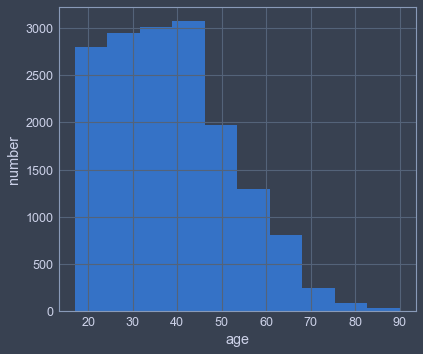

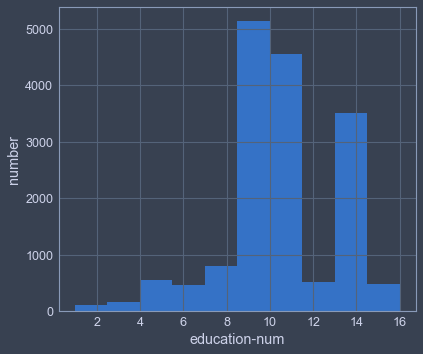

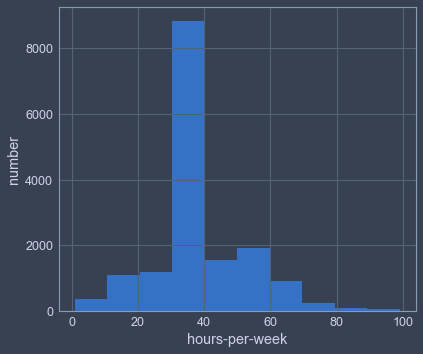

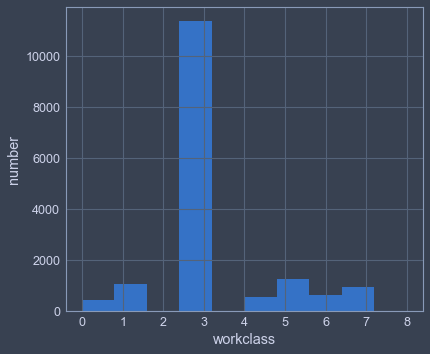

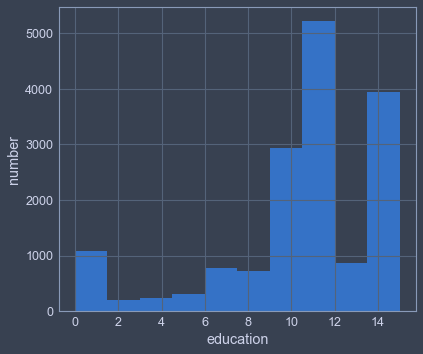

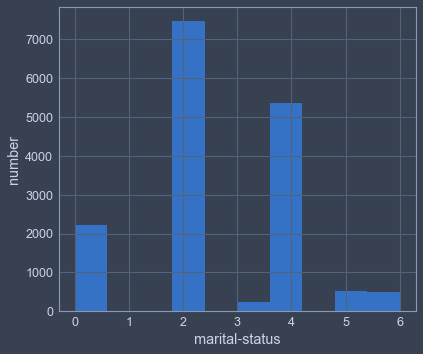

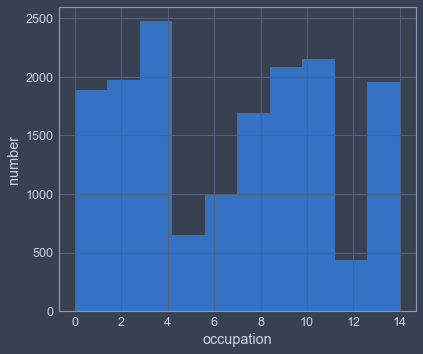

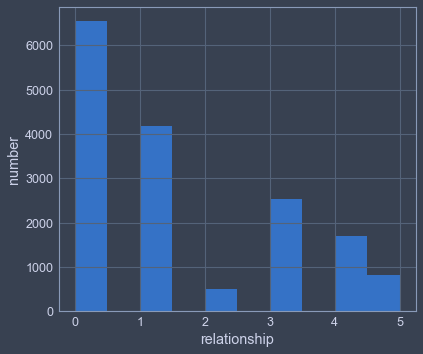

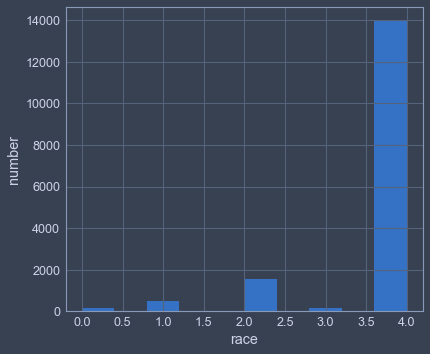

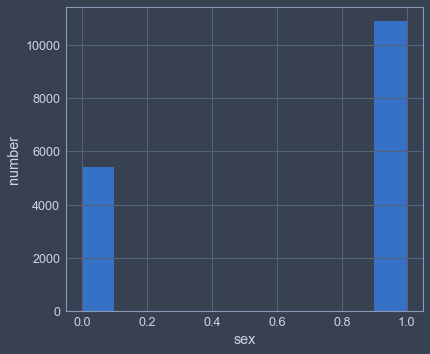

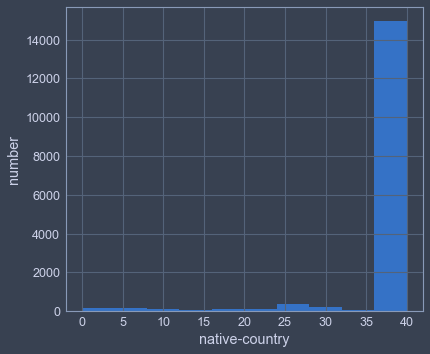

In [22]:
# use the histogram to evaluate the distributions of the features 
for i in range(11):
    plt.hist(X[:,i])
    plt.xlabel(x_train_drop.columns[i])
    plt.ylabel("number")
    plt.show()

In [23]:
# merge 1st-12th
def primary(x):
    if x in [' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' 10th', ' 11th', ' 12th']:
        return ' Primary'
    else:
        return x
    
x_train_drop["education"] = x_train_drop["education"].apply(primary)
x_test_drop["education"] = x_test_drop["education"].apply(primary)

In [24]:
# encode categorical features
enc = preprocessing.OrdinalEncoder()
enc.fit(x_train_drop[cat_features])
x_train_discrete = enc.transform(x_train_drop[cat_features])
assert(x_train_discrete.shape == x_train_drop[cat_features].shape)

# extract numeric features
x_train_numeric = np.array(x_train_drop[num_features])
assert(x_train_numeric.shape == x_train_drop[num_features].shape)

# generate processed X
X = np.concatenate((x_train_numeric,x_train_discrete), axis=1)
Y = np.array(y_train_drop).reshape([len(y_train_drop),])

assert(len(X) == len(Y))

# This preprocessing procedure should be applied on testing set as well
x_test_discrete = enc.transform(x_test_drop[cat_features])
assert(x_test_discrete.shape == x_test_drop[cat_features].shape)

x_test_numeric = np.array(x_test_drop[num_features])
assert(x_test_numeric.shape == x_test_drop[num_features].shape)

X_test = np.concatenate((x_test_discrete, x_test_numeric), axis=1)

In [25]:
# standerlize and normalize the training set
scaler_std = preprocessing.StandardScaler().fit(X)
scaler_norm = preprocessing.Normalizer().fit(X)

X_std = scaler_std.transform(X)
X_norm = scaler_norm.transform(X)

## Experiments

### Question 1
<span style="color:#e6bc53">(1 point) Now set up your experiment. Clearly explain how you divided the data and
how you ensured that your measurements are valid. Use no more than 100 words.</span>

<p>We decided to use KFlod cross-validation to train and test our models because it could make full use of the dataset, and try its best to avoid the overfitting problem.</p>
<p>In terms of ensuring our measurements, we plotted the learning curve for the training and testing processes in order to monitor the performance of the measurements to guarantee its validation.</p>

In [26]:
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.model_selection import learning_curve, validation_curve

### Question 2
<span style="color:#e6bc53">(2 points) Fit the five algorithms using the default hyper-parameters from section 2.1.
Create a useful plot that shows the performances of the algorithms. Clearly explain
what this plot tells us about the performances of the algorithms. Also, clearly explain
why you think some algorithms perform better than others. Use no more than 150
words and two plots (but 1 is sufficient).
</span>



In [27]:
# build up five algorithms
random_state = 42

models = {
    "GaussianNB": GaussianNB(),
    
    "DecisionTreeClassifier": DecisionTreeClassifier(
        max_depth=None, 
        min_samples_leaf=2, 
        random_state=random_state
    ),
    
    "KNeighborsClassifier": KNeighborsClassifier(
        n_neighbors=3, 
        weights="distance"
    ),
    
    "SVM": SVC(
        C=10, 
        kernel="poly", 
        random_state=random_state
    ),
    
    "LogisticRegression": LogisticRegression(
        C=10,
        penalty="none",
        random_state=random_state
    ),
}


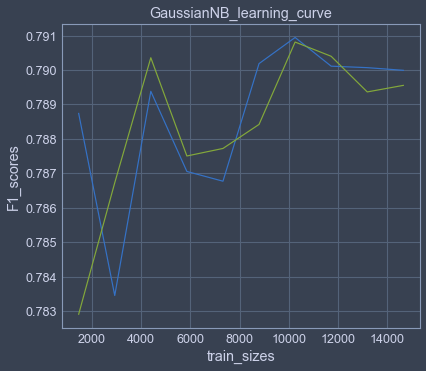

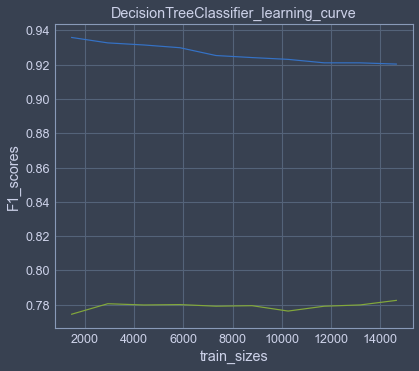

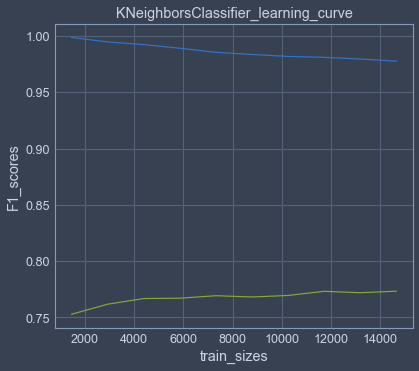

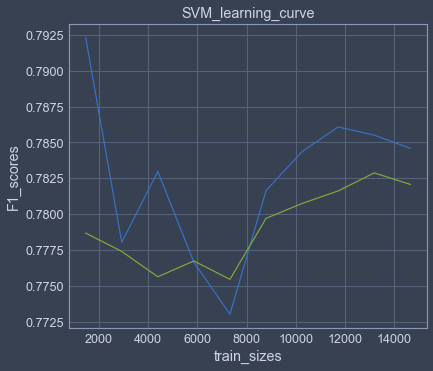

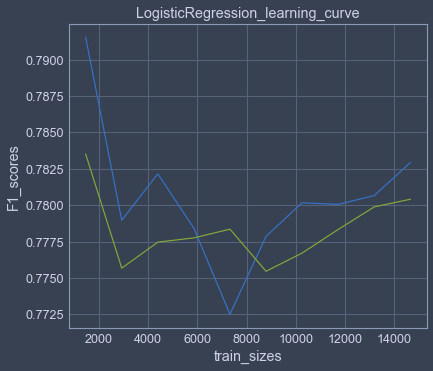

In [28]:
# plot the validation curve
cv = KFold(n_splits=10, random_state=random_state, shuffle=True)
scoring_method_F1 = make_scorer(lambda prediction, true_target:
                                f1_score(prediction, true_target, average="weighted"))
scoring_method_acc = make_scorer(lambda prediction, true_target:
                                 accuracy_score(prediction, true_target))

for name, model in models.items():
    train_sizes, train_scores, valid_scores = learning_curve(model,
                                                            X, Y,
                                                            train_sizes=np.linspace(0.1, 1, 10),
                                                            cv=cv,
                                                            scoring='f1_weighted',
                                                            n_jobs=8
                                                           )
    train_scores_mean = np.mean(train_scores, axis=1)
    valid_scores_mean = np.mean(valid_scores, axis=1)
    plt.plot(train_sizes, train_scores_mean, label="train_scores")
    plt.plot(train_sizes, valid_scores_mean, label="valid_scores")
    plt.xlabel("train_sizes")
    plt.ylabel("F1_scores")
    plt.title(name+"_learning_curve")
    plt.show()


In [29]:
# generate measurements for validation (K-flod cross validation)
def k_fold_fit_and_evaluate(X, y, model, scoring_method, n_splits=5):
    # define evaluation procedure
    cv = KFold(n_splits=n_splits, random_state=42, shuffle=True)
    # evaluate model
    scores = cross_validate(model, X, y, scoring=scoring_method, cv=cv, n_jobs=-1)
    
    return scores["test_score"]

In [30]:
# validate the models by testing data
for name, model in models.items():
    print(name)
    metrics_F1 = k_fold_fit_and_evaluate(X, Y, model, scoring_method_F1, n_splits=5)
    metrics_acc = k_fold_fit_and_evaluate(X, Y, model, scoring_method_acc, n_splits=5)
    print(" mean F1:", '\t', " std F1")
    print(format(np.mean(metrics_F1),"5f"), '\t', format(np.std(metrics_F1),"5f"))
    print(" mean Accuracy", '\t', " std Accuracy")
    print(format(np.mean(metrics_acc),"5f"), '\t', format(np.std(metrics_acc),"5f"))
    print()

GaussianNB
 mean F1: 	  std F1
0.789848 	 0.008278
 mean Accuracy 	  std Accuracy
0.782125 	 0.009244

DecisionTreeClassifier
 mean F1: 	  std F1
0.780167 	 0.009868
 mean Accuracy 	  std Accuracy
0.787531 	 0.010321

KNeighborsClassifier
 mean F1: 	  std F1
0.773505 	 0.003595
 mean Accuracy 	  std Accuracy
0.774509 	 0.002078

SVM
 mean F1: 	  std F1
0.782466 	 0.009929
 mean Accuracy 	  std Accuracy
0.808415 	 0.007882

LogisticRegression
 mean F1: 	  std F1
0.779953 	 0.006116
 mean Accuracy 	  std Accuracy
0.799324 	 0.005608



### Question 3

In [31]:
# find the best C for LogisticRegression
param_range = np.arange(1,20)
train_scores, valid_scores = validation_curve(models["LogisticRegression"],
                                              X, Y,
                                              "C", param_range,
                                              cv=cv,
                                              scoring='f1_weighted',
                                              n_jobs=8
                                             )

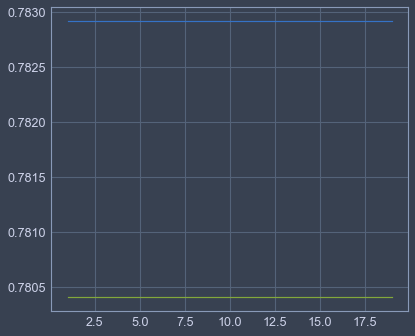

In [32]:
plt.plot(param_range, np.mean(train_scores,axis=1), label='train_scores')
plt.plot(param_range, np.mean(valid_scores,axis=1), label='valid_scores')
plt.show()

### Question 4

In [33]:
# find the best C for SVM
param_range = np.arange(10,110,10)
train_scores, valid_scores = validation_curve(models["SVM"],
                                              X, Y,
                                              "C", param_range,
                                              cv=cv,
                                              scoring='f1_weighted',
                                              n_jobs=8
                                             )

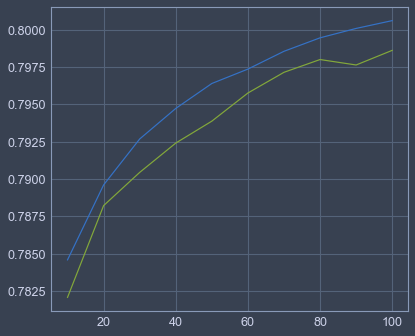

In [34]:
plt.plot(param_range, np.mean(train_scores,axis=1), label='train_scores')
plt.plot(param_range, np.mean(valid_scores,axis=1), label='valid_scores')
plt.show()

In [35]:
from sklearn.model_selection import GridSearchCV

model_parameters = {
    "GaussianNB": {
    
    },
    
    "DecisionTreeClassifier": {
        'random_state': [random_state],
        'min_samples_leaf': [2, 4, 6, 8, 10],
        'max_depth': [10, 40, 70, 100, 400, 700, None]
    },
    
    "KNeighborsClassifier": {
        "n_neighbors": [3, 7, 9, 13, 15, 19],
        "weights": ["distance"] 
    },
    
    "SVM": {
        "C": np.arange(10, 110, 10),
#         "kernal": ["poly"],
        "random_state": [random_state]
    },
    
    "LogisticRegression": {
        "C": np.arange(10, 110, 10),
        "penalty": ['l1', 'l2', 'elasticnet', 'none'],
        "random_state": [random_state]
    }
}

random_state = 42
n_splits = 10
scoring_method = make_scorer(lambda prediction, true_target: f1_score(prediction, true_target, average="weighted"))

for model_name, parameters in model_parameters.items():
    model = models[model_name]
    
    cv = KFold(n_splits=n_splits, random_state=random_state, shuffle=True)
    grid_search = GridSearchCV(model, parameters, cv=cv, n_jobs=-1, verbose=False, scoring=scoring_method).fit(X, Y)
    
    best_model = grid_search.best_estimator_
    best_score = grid_search.best_score_
    best_params = grid_search.best_params_
    
    print(model_name)
    print("- best_score =", best_score)
    print("best paramters:")
    for k,v in best_params.items():
        print("-", k, v)


GaussianNB
- best_score = 0.7895539497627226
best paramters:
DecisionTreeClassifier
- best_score = 0.8209999179075101
best paramters:
- max_depth 10
- min_samples_leaf 10
- random_state 42
KNeighborsClassifier
- best_score = 0.7870556137243816
best paramters:
- n_neighbors 19
- weights distance
SVM
- best_score = 0.7986208879793998
best paramters:
- C 100
- random_state 42
LogisticRegression
- best_score = 0.7825789264876599
best paramters:
- C 80
- penalty l2
- random_state 42


### Question 5

In [36]:
# #TODO
# prediction = np.array([-1] * len(X_test)) #TODO replace this with you own prediction
# pd.DataFrame(prediction).to_csv("GROUP_classes_problem_census.txt", index=False, header=False)